In [1]:
from sympy import symbols
from sympy.physics.mechanics import ReferenceFrame,Point,dynamicsymbols
import sys
sys.path.append('../tools')
from vis import Visualizer
import numpy as np
%matplotlib notebook

<IPython.core.display.Javascript object>


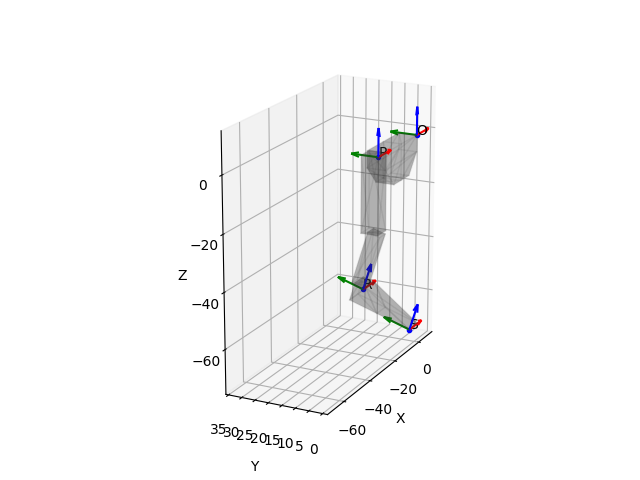

In [2]:
# Ejemplo modelo simplificado de una pierna

# Defina los símbolos para las variables de movimiento
q1,q2,q3,q4=symbols('q1,q2,q3,q4')

# Se definen marcos de referencia para cada parte A B C D
a=ReferenceFrame('A')

# Aqui un comentario para aclarar esta seccion:
# Segun el ejemplo del libro q1 es rotacion en a1(ax) y luego q2 es rotacion en y.
# La figura 5 puede no ser muy clara por si sola hasta que no se revisa el eje intermedio e (figura 6) y se entiende
# que las rotaciones q1 y q2  son flexión/extensión (q1) y abducción/adducción (q2) de la cadera.
# Teniendo en cuenta esto, se define también el marco de referencia intermedio "E" para mayor claridad.
# Aunque se podría realizar directamente la definición del marco b asi: 
# b=a.orientnew('B','Body',(q1,q2,0),'XYZ') 

# Defina e rotando q1 en a.x
e=a.orientnew('E','Axis',(q1,a.x))
# Defina b rotando q2 en e.y
b=e.orientnew('B','Axis',(q2,e.y))
# Defina c rotando q3 en b.z
c=b.orientnew('C','Axis',(q3,b.x))
# Defina D rotando q4 en c.x
d=c.orientnew('D','Axis',(q4,-c.x))

# Luega defina cada punto usando los sistemas de coordenadas
# Primero el Origen O en la pelvis
O=Point('O') 
l1,l2,l3,l4,l5,l6,l7,l8=symbols('l1,l2,l3,l4,l5,l6,l7,l8') # variables de distancia
origen_b=O.locatenew('P',-l1*a.x+l2*a.y-l3*b.x-l4*b.y)
rodilla=origen_b.locatenew('Q',-l5*b.z)
origen_c=rodilla.locatenew('R',-l6*c.z)
origen_d=origen_c.locatenew('S',-l7*d.z-l8*d.y)


vis=Visualizer(a,O)
vis.add(a,O,shape='assets/Pierna_pelvis.stl')
vis.add(b,origen_b,shape='assets/Pierna_femur.stl')
vis.add(c,origen_c,shape='assets/Pierna_tibia.stl')
vis.add(d,origen_d,shape='assets/Pierna_pie.stl')
vis.add(a,O,frame_scale=10)
vis.add(b,origen_b,frame_scale=10)
vis.add(c,origen_c,frame_scale=10)
vis.add(d,origen_d,frame_scale=10)

vis.plot({q1:0,q2:0.5,q3:0,q4:-0.5,l1:25,l2:3.5,l3:6,l4:3.5,l5:30,l6:18,l7:6,l8:20})

In [3]:
#Modifique las variables de movimiento para cambiar la configuracion cinematica del modelo
#Puede hacerlo desde esta celda para actualizar el modelo sin tener que volver a generar la figura.
constants={l1:25,l2:3.5,l3:6,l4:3.5,l5:30,l6:18,l7:6,l8:20}
vis.plot({**{q1:0,q2:0.5,q3:0,q4:-0.5},**constants})


In [5]:
#Esto permite crear animaciones facilmente
#Ejecute esta celda y de click en la figura 1 para observar la animación del movimiento.
import matplotlib
from matplotlib.animation import FuncAnimation
tt=np.linspace(0,10,100)
qq1=0.5*np.sin(2*np.pi*0.1*tt)
qq2=0.2*np.sin(2*np.pi*0.15*tt)
qq3=0.3*(1-np.sin(2*np.pi*0.15*tt))
qq4=0.3*np.sin(2*np.pi*0.15*tt)
constants={l1:25,l2:3.5,l3:6,l4:3.5,l5:30,l6:18,l7:6,l8:20}

def animfunc(i,qq1,qq2):    
    vis.plot({**{q1:qq1[i],q2:qq2[i],q3:qq3[i],q4:qq4[i]},**constants})
    

anim=FuncAnimation(vis.fig,animfunc,fargs=(qq1,qq2),interval=5)
